## Analyse distribution in datasets

In [4]:
import json
import pandas as pd


path_maps = {
    "train": "/home/ubuntu/kiva-iccv/data/train.json",
    "validation": "/home/ubuntu/kiva-iccv/data/validation.json",
}


def load_data_as_df(which: str):
    with open(path_maps[which], "r") as f:
        data = json.load(f)
    return pd.DataFrame.from_dict(data, orient="index")

def analyse(which: str):
    df = load_data_as_df(which)

    print("=" * 50)
    print(f"Analyzing {which}")
    print("=" * 50)

    # start by counting the level 
    level_counts = df["level"].value_counts()
    level_percentages = df["level"].value_counts(normalize=True) * 100
    level_table = pd.DataFrame({
        'Count': level_counts,
        'Percentage': level_percentages
    })

    # count the concepts per level
    concept_counts_by_level = df.groupby(['level', 'concept']).size().reset_index(name='Count')
    concept_counts_by_level['Percentage'] = df.groupby(['level', 'concept']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).values

    # table that counts the transformation_domain per level
    transformation_domain_by_level = df.groupby(['level', 'transformation_domain']).size().reset_index(name='Count')
    transformation_domain_by_level['Percentage'] = df.groupby(['level', 'transformation_domain']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).values

    display(level_table)
    display(concept_counts_by_level)
    display(transformation_domain_by_level)

analyse("train")
analyse("validation")


Analyzing train


,Count,Percentage
level,,
kiva-functions-compositionality,2208,80.232558
kiva-functions,368,13.372093
kiva,176,6.395349


,level,concept,Count,Percentage
0,kiva,Counting+1,16,9.090909
1,kiva,Counting+2,16,9.090909
2,kiva,Counting-1,16,9.090909
3,kiva,Counting-2,16,9.090909
4,kiva,ReflectX,16,9.090909
...,...,...,...,...
167,kiva-functions-compositionality,"Resizing0.5XY,Rotation-90",16,0.724638
168,kiva-functions-compositionality,"Resizing0.5XY,Rotation180",16,0.724638
169,kiva-functions-compositionality,"Resizing2XY,Rotation+90",16,0.724638
170,kiva-functions-compositionality,"Resizing2XY,Rotation-90",16,0.724638


,level,transformation_domain,Count,Percentage
0,kiva,Counting,64,36.363636
1,kiva,Reflect,32,18.181818
2,kiva,Resizing,32,18.181818
3,kiva,Rotation,48,27.272727
4,kiva-functions,Counting,128,34.782609
5,kiva-functions,Reflect,32,8.695652
6,kiva-functions,Resizing,96,26.086957
7,kiva-functions,Rotation,112,30.434783
8,kiva-functions-compositionality,"Counting,Reflect",256,11.594203
9,kiva-functions-compositionality,"Counting,Resizing",768,34.782609


Analyzing validation


,Count,Percentage
level,,
kiva-functions-compositionality,4278,80.232558
kiva-functions,713,13.372093
kiva,341,6.395349


,level,concept,Count,Percentage
0,kiva,Counting+1,31,9.090909
1,kiva,Counting+2,31,9.090909
2,kiva,Counting-1,31,9.090909
3,kiva,Counting-2,31,9.090909
4,kiva,ReflectX,31,9.090909
...,...,...,...,...
167,kiva-functions-compositionality,"Resizing0.5XY,Rotation-90",31,0.724638
168,kiva-functions-compositionality,"Resizing0.5XY,Rotation180",31,0.724638
169,kiva-functions-compositionality,"Resizing2XY,Rotation+90",31,0.724638
170,kiva-functions-compositionality,"Resizing2XY,Rotation-90",31,0.724638


,level,transformation_domain,Count,Percentage
0,kiva,Counting,124,36.363636
1,kiva,Reflect,62,18.181818
2,kiva,Resizing,62,18.181818
3,kiva,Rotation,93,27.272727
4,kiva-functions,Counting,248,34.782609
5,kiva-functions,Reflect,62,8.695652
6,kiva-functions,Resizing,186,26.086957
7,kiva-functions,Rotation,217,30.434783
8,kiva-functions-compositionality,"Counting,Reflect",496,11.594203
9,kiva-functions-compositionality,"Counting,Resizing",1488,34.782609


In [30]:

def get_info_per_level_and_domain(which, level, domain):
    df = load_data_as_df(which)
    df = df[df['level'] == level]
    df = df[df['transformation_domain'] == domain]
    print(f"Info for {level} and {domain}")
    print(f" - Available concepts: {sorted(df['concept'].unique())}")
    values = []
    for col in ["train_input_value", "train_output_value", "test_input_value", "correct_test_value", "incorrect_test_output_value1", "incorrect_test_output_value2"]:
        print(f" - {col}: {sorted(df[col].unique())}")
        values.extend(list(df[col].unique()))
    print(f" --> Available values: {sorted(set(values))}")

    print("-" * 50)
    print("10 example samples")
    for i in range(10):
        print(f"Sample {i+1}:")
        print(df.iloc[i])
        print("\n")

get_info_per_level_and_domain("train", "kiva-functions", "Resizing")

Info for kiva-functions and Resizing
 - Available concepts: ['Resizing0.5X', 'Resizing0.5XY', 'Resizing0.5Y', 'Resizing2X', 'Resizing2XY', 'Resizing2Y']
 - train_input_value: ["('0.8X', '0.8Y')", "('0.8X', '1Y')", "('1.2X', '1.2Y')", "('1.2X', '1Y')", "('1X', '0.8Y')", "('1X', '1.2Y')", "('1X', '1Y')"]
 - train_output_value: ["('0.4X', '0.4Y')", "('0.4X', '0.5Y')", "('0.4X', '0.8Y')", "('0.4X', '1Y')", "('0.5X', '0.4Y')", "('0.5X', '0.5Y')", "('0.5X', '0.6Y')", "('0.5X', '0.8Y')", "('0.5X', '1.2Y')", "('0.5X', '1Y')", "('0.6X', '0.5Y')", "('0.6X', '0.6Y')", "('0.6X', '1.2Y')", "('0.6X', '1Y')", "('0.8X', '1.6Y')", "('0.8X', '2Y')", "('1.2X', '0.5Y')", "('1.2X', '0.6Y')", "('1.2X', '2.4Y')", "('1.2X', '2Y')", "('1.6X', '0.8Y')", "('1.6X', '1.6Y')", "('1.6X', '1Y')", "('1.6X', '2Y')", "('1X', '0.4Y')", "('1X', '0.5Y')", "('1X', '0.6Y')", "('1X', '0.8Y')", "('1X', '1.6Y')", "('1X', '1Y')", "('1X', '2.4Y')", "('1X', '2Y')", "('2.4X', '1Y')", "('2.4X', '2.4Y')", "('2.4X', '2Y')", "('2X', '0

Dataset Initialized. An epoch will consist of 100 generated samples.
torch.Size([3, 600, 600])


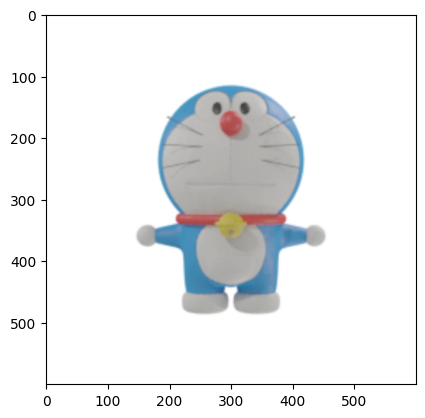

DEBUG: factor: 0.5XY
DEBUG: scale: 0.5, axis: XY
torch.Size([3, 600, 600])


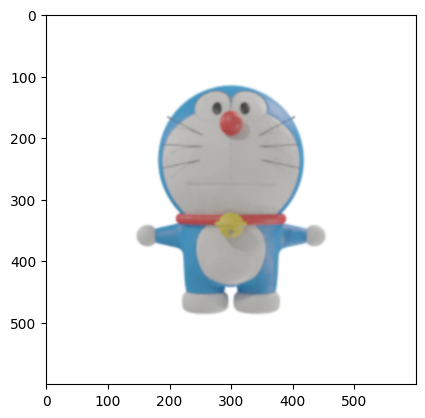

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-12.0..17.0].


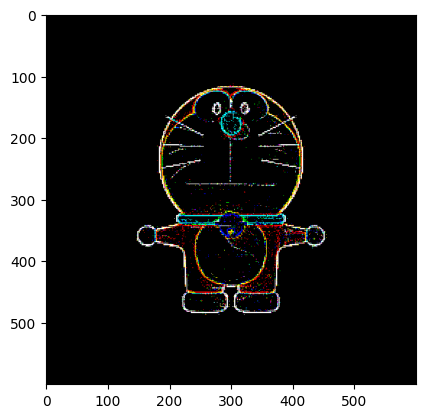

In [1]:
## DEBUG Resizing
import sys
sys.path.insert(0, "/home/ubuntu/kiva-iccv/kiva-iccv")
from utils.dataset.transformations_kiva_adults import apply_resizing_original, apply_resizing
from on_the_fly_dataset import OnTheFlyKiVADataset

DATA_DIR = "/home/ubuntu/kiva-iccv/data/KiVA/untransformed objects"
kiva_dataset = OnTheFlyKiVADataset(
    data_dir=DATA_DIR,
    distribution_config={"kiva-functions-Resizing": 1},
    epoch_length=100,  # smaller epoch for quick demo
)


img = kiva_dataset._load_random_images(1, ["Resizing"])[0]

# sizes and display
print(img.shape)
# display
import matplotlib.pyplot as plt
plt.imshow(img.permute(1, 2, 0))
plt.show()

# apply resizing
out, _, _ = apply_resizing(img, "0.5XY", "train")

print(out.shape)
# display
plt.imshow(out.permute(1, 2, 0))
plt.show()
import torch
# Since torch.allclose is False, let's print how they are different.
# Shapes are the same, so plot the vector of differences.
diff = (out.float() - img.float())
plt.imshow(diff.permute(1, 2, 0))